In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
df=pd.read_csv(r"C:\Users\geono\Downloads\archive (4)\Suicide_Ideation_Dataset(Twitter-based).csv")

In [153]:
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


In [154]:
df.describe()

,Tweet,Suicide
count,1785,1787
unique,1777,2
top,Became as hot as the persistent days resting h...,Not Suicide post
freq,2,1127


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB


In [156]:
df.dropna(inplace=True)

**EDA**

In [157]:
df['Tweet_len']=df['Tweet'].apply(len)

In [158]:
df.head()

,Tweet,Suicide,Tweet_len
0,making some lunch,Not Suicide post,17
1,@Alexia You want his money.,Not Suicide post,27
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,86
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,66
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,143


Text(0.5, 1.0, 'Distribution Of Tweet Length')

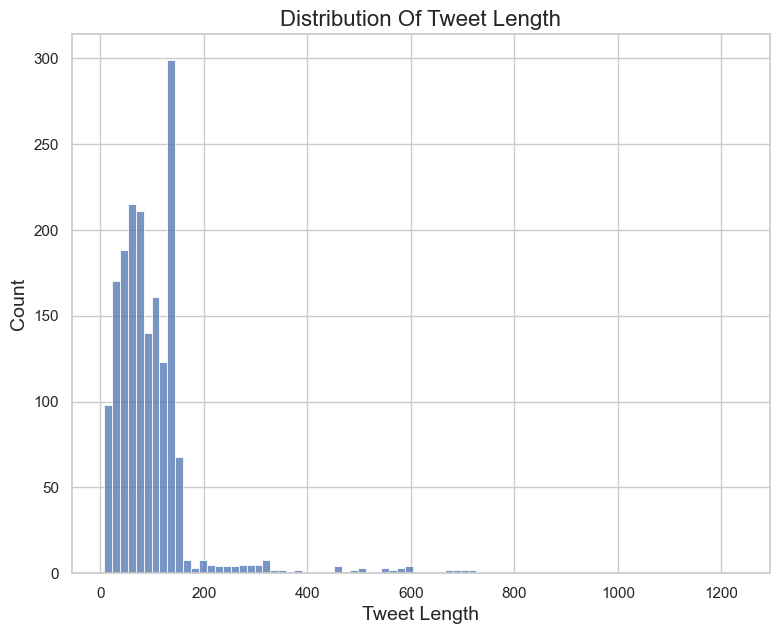

In [159]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9,7))
sns.histplot(data=df,x='Tweet_len',bins=80)
plt.xlabel('Tweet Length',fontsize='14')
plt.ylabel('Count',fontsize='14')
plt.title('Distribution Of Tweet Length',fontsize='16')

Text(0.5, 1.0, 'Distribution Of Tweet Length')

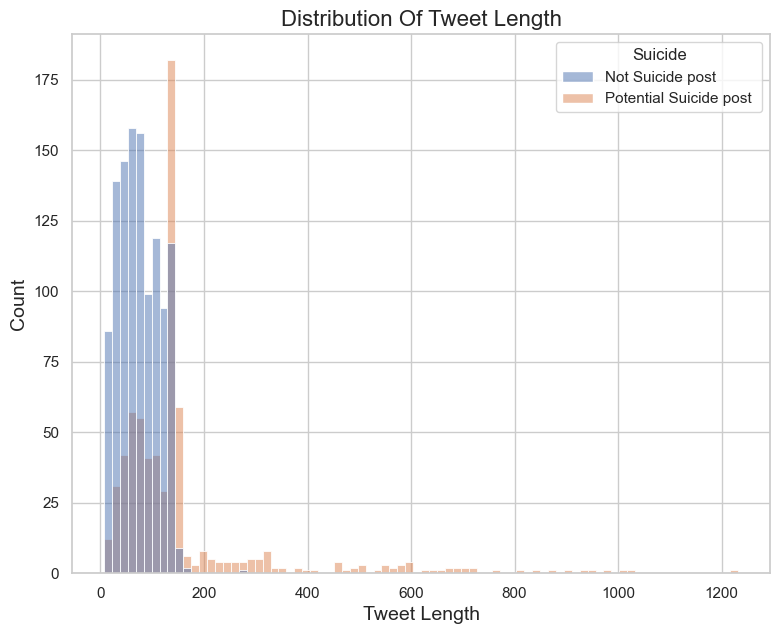

In [160]:
plt.figure(figsize=(9,7))
sns.histplot(data=df,x='Tweet_len',bins=80,hue='Suicide')
plt.xlabel('Tweet Length',fontsize='14')
plt.ylabel('Count',fontsize='14')
plt.title('Distribution Of Tweet Length',fontsize='16')

In [161]:
df2=df[df['Tweet_len']>200]

Text(0.5, 1.0, 'Distribution Of Tweet With Length Over 200')

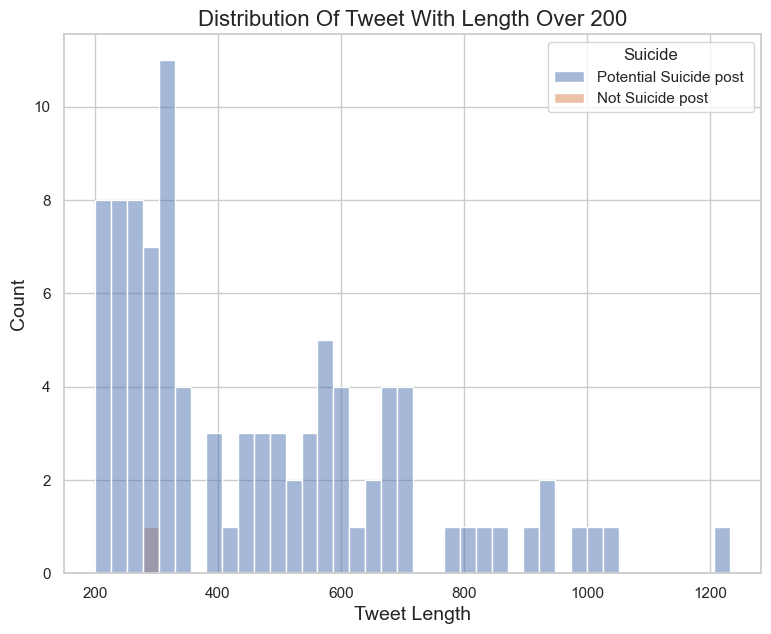

In [162]:
plt.figure(figsize=(9,7))
sns.histplot(data=df2,x='Tweet_len',bins=40,hue='Suicide' )
plt.xlabel('Tweet Length',fontsize='14')
plt.ylabel('Count',fontsize='14')
plt.title('Distribution Of Tweet With Length Over 200',fontsize='16')

[Text(0, 0, '659')]

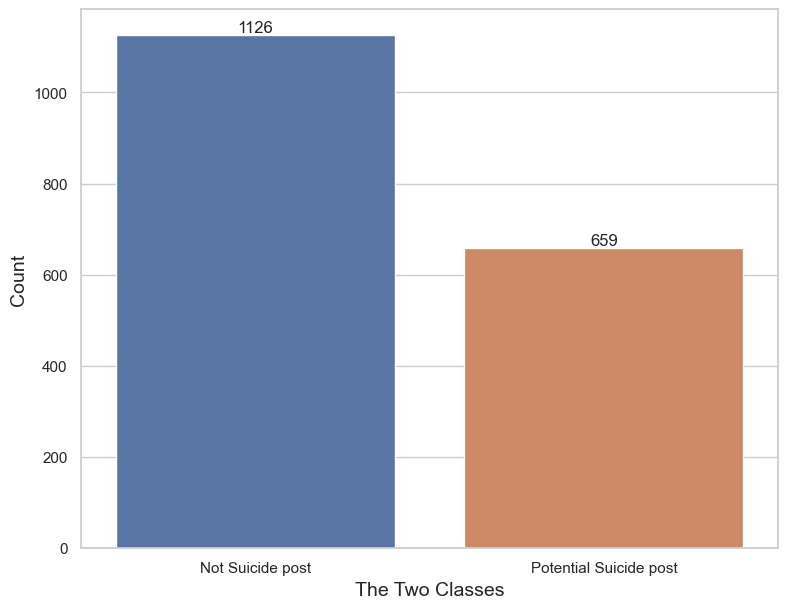

In [227]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x=df['Suicide'],hue=df['Suicide'])
plt.xlabel('The Two Classes',fontsize='14')
plt.ylabel('Count',fontsize='14')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

**Text Pre-Processing**

In [164]:
import string
import nltk


In [165]:
#nltk.download_shell()

In [166]:
from nltk.corpus import stopwords

In [167]:
df['Suicide']=df['Suicide'].str.strip()

In [168]:
tweet='Hey Jer! Since when did'
nopunc=[char for char in tweet if char not in string.punctuation]

In [169]:
nopunc=''.join(nopunc)

In [170]:
nopunc

'Hey Jer Since when did'

In [171]:
nopunc=nopunc.split()

In [172]:
nopunc

['Hey', 'Jer', 'Since', 'when', 'did']

In [173]:
clean_tweet=[char for char in nopunc if char not in stopwords.words('english')]

In [174]:
clean_tweet

['Hey', 'Jer', 'Since']

In [175]:
clean_tweet=' '.join(clean_tweet)

In [176]:
clean_tweet

'Hey Jer Since'

In [177]:
def remover(tweet):
    nopunc=[char for char in tweet if char not in string.punctuation]
    nopunc=''.join(nopunc)
    nopunc=nopunc.split()
    clean_tweet=[char for char in nopunc if char not in stopwords.words('english')]
  
    return clean_tweet

In [178]:
df['Tweet'].apply(remover)

0                                         [making, lunch]
1                              [Alexia, You, want, money]
2       [dizzyhrvy, crap, took, forever, put, together...
3       [jnaylor, kiwitweets, Hey, Jer, Since, start, ...
4       [Trying, quotDelicious, Library, 2quot, mixed,...
                              ...                        
1782                 [forgotten, much, love, Nokia, N951]
1783    [Starting, day, positive, attitude, To, great,...
1784    [belledame222, Hey, 5, amgive, girl, credit, t...
1785    [2, drunken, besties, stumble, room, run, arou...
1786    [dancingbonita, quotI, friggin, love, youquot,...
Name: Tweet, Length: 1785, dtype: object

**ML Section**

*Vectorization*

In [179]:
from sklearn.feature_extraction.text import CountVectorizer

In [180]:
countvector=CountVectorizer(analyzer=remover)

In [181]:
bow_tweets=countvector.fit_transform(df['Tweet'])

In [182]:
bow_tweets.shape

(1785, 7169)

In [183]:
bow_tweets.nnz

19130

In [184]:
sparsity=bow_tweets.nnz/(bow_tweets.shape[0]*bow_tweets.shape[1])*100
print('The Sparsity Is: {}%'.format(round(sparsity,2)))

The Sparsity Is: 0.15%


*Time For Tf-Idf*

In [185]:
from sklearn.feature_extraction.text import TfidfTransformer

In [186]:
tfid_transformer=TfidfTransformer()

In [187]:
tweets_tfidf=tfid_transformer.fit_transform(bow_tweets)

In [188]:
tweets_tfidf

<1785x7169 sparse matrix of type '<class 'numpy.float64'>'
	with 19130 stored elements in Compressed Sparse Row format>

In [189]:
df.columns

Index(['Tweet', 'Suicide', 'Tweet_len'], dtype='object')

*Let's Train Our First Model*

In [190]:
from sklearn.naive_bayes import MultinomialNB

In [191]:
suiside_detector=MultinomialNB().fit(tweets_tfidf,df['Suicide'])

**Create A Pipeline**

*Train-Test-Split*

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X=df['Tweet']
y=df['Suicide']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [195]:
from sklearn.pipeline import Pipeline

In [196]:
pipeline=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])

In [197]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [198]:
predictions=pipeline.predict(X_test)

*Evaluation*

In [211]:
from sklearn.metrics import classification_report,confusion_matrix

In [200]:
print(classification_report(y_test,predictions))

                        precision    recall  f1-score   support

      Not Suicide post       0.94      0.96      0.95       218
Potential Suicide post       0.93      0.91      0.92       139

              accuracy                           0.94       357
             macro avg       0.94      0.93      0.93       357
          weighted avg       0.94      0.94      0.94       357



In [201]:
print(confusion_matrix(y_test,predictions))

[[209   9]
 [ 13 126]]


Text(0.5, 1.0, 'Confusion Matrix')

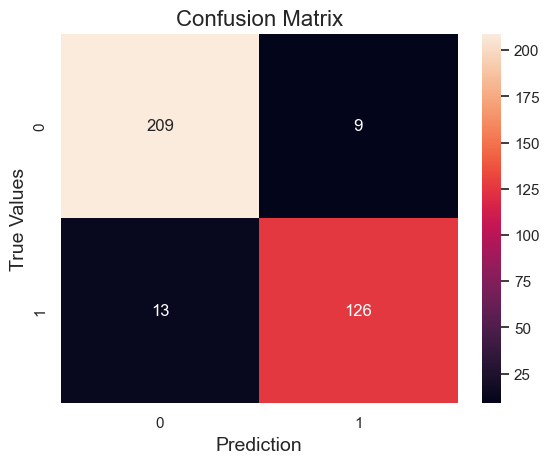

In [205]:

sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d')
plt.xlabel('Prediction',fontsize=14)
plt.ylabel('True Values',fontsize=14)
plt.title('Confusion Matrix',fontsize=16)

Text(0.5, 1.0, 'Predictions Distribution Of Two Classes')

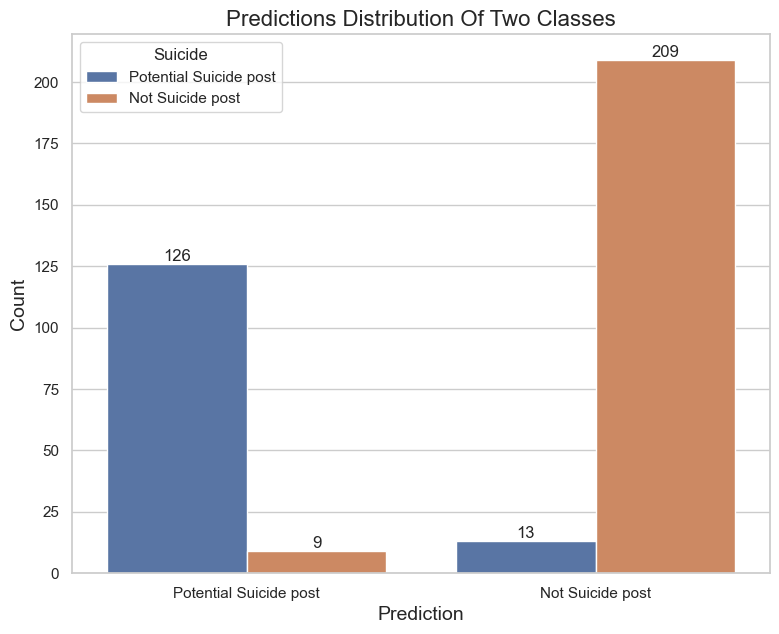

In [225]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x=predictions,hue=y_test)

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


plt.xlabel('Prediction',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Predictions Distribution Of Two Classes',fontsize=16)

**Let's Use ANN**

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

from tensorflow.keras.optimizers import Adam

In [119]:
model = Sequential()
model.add(Dense(7169, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    


In [120]:
X_train.shape

(1428, 7169)

In [143]:
X_new=tweets_tfidf
y_new=pd.get_dummies(y,dtype=int,drop_first=True)


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=101)
                            

In [145]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [146]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),verbose=2,callbacks=[early_stop])

Epoch 1/20
45/45 - 28s - 621ms/step - accuracy: 1.0000 - loss: 1.1735e-06 - val_accuracy: 0.8964 - val_loss: 0.3892
Epoch 2/20
45/45 - 27s - 605ms/step - accuracy: 1.0000 - loss: 1.3118e-06 - val_accuracy: 0.8964 - val_loss: 0.3909
Epoch 3/20
45/45 - 27s - 600ms/step - accuracy: 1.0000 - loss: 1.2430e-06 - val_accuracy: 0.8964 - val_loss: 0.3918
Epoch 4/20
45/45 - 28s - 614ms/step - accuracy: 1.0000 - loss: 9.4093e-07 - val_accuracy: 0.8964 - val_loss: 0.3925
Epoch 5/20
45/45 - 27s - 600ms/step - accuracy: 1.0000 - loss: 7.8914e-07 - val_accuracy: 0.8992 - val_loss: 0.3927
Epoch 6/20
45/45 - 27s - 598ms/step - accuracy: 1.0000 - loss: 6.1658e-07 - val_accuracy: 0.8992 - val_loss: 0.3931
Epoch 7/20
45/45 - 27s - 599ms/step - accuracy: 1.0000 - loss: 9.6608e-07 - val_accuracy: 0.8992 - val_loss: 0.3947
Epoch 8/20
45/45 - 27s - 600ms/step - accuracy: 1.0000 - loss: 9.3282e-07 - val_accuracy: 0.8992 - val_loss: 0.3967
Epoch 9/20
45/45 - 27s - 600ms/step - accuracy: 1.0000 - loss: 8.3376e-0

In [147]:
loss=pd.DataFrame(model.history.history)


<Axes: >

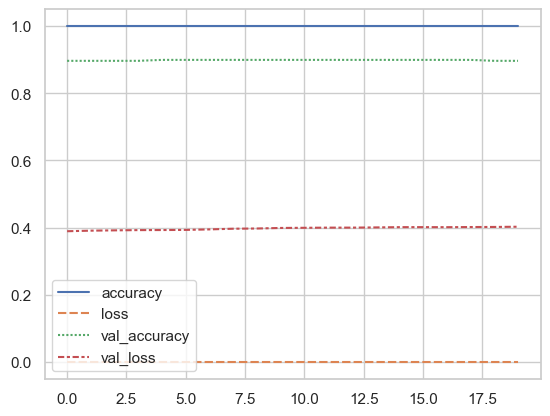

In [148]:
sns.lineplot(loss)

In [277]:
predictions=(model.predict(X_test)>0.5).astype('int32')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [278]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       218
           1       0.91      0.81      0.86       139

    accuracy                           0.90       357
   macro avg       0.90      0.88      0.89       357
weighted avg       0.90      0.90      0.90       357



In [279]:
print(confusion_matrix(y_test,predictions))

[[207  11]
 [ 26 113]]


Text(0.5, 1.0, 'Confusion Matrix')

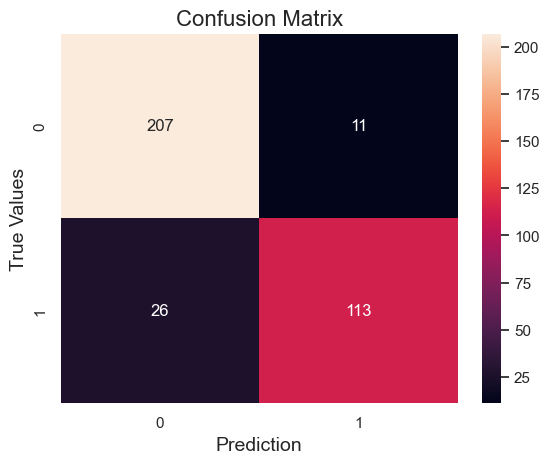

In [280]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d')
plt.xlabel('Prediction',fontsize=14)
plt.ylabel('True Values',fontsize=14)
plt.title('Confusion Matrix',fontsize=16)

In [282]:
predictions=predictions.reshape(-1,)

In [283]:
predictions=pd.DataFrame(predictions)

In [284]:
predictions.index=y_test.index

In [286]:
merged_df = pd.merge(predictions, y_test, left_index=True, right_index=True)

Text(0.5, 1.0, 'Predictions Distribution Of Two Classes')

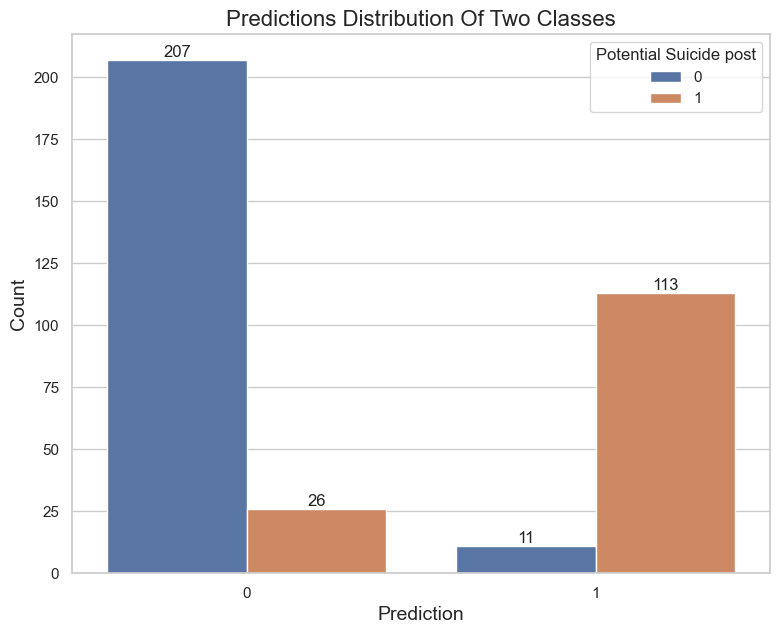

In [287]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x=merged_df[0],hue='Potential Suicide post',data=merged_df)

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


plt.xlabel('Prediction',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Predictions Distribution Of Two Classes',fontsize=16)